# Problem- 1)

Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import string
import spacy
import re
from wordcloud import WordCloud

In [2]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
elon= pd.read_csv('C:/Users/ancha/Downloads/Elon_musk.csv',index_col=0,encoding='ISO-8859-1')
elon

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA

In [4]:
elon.shape

(1999, 1)

In [5]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [6]:
elon.duplicated().value_counts()

False    1997
True        2
dtype: int64

In [7]:
elon[elon.duplicated()]

,Text
325,The most entertaining outcome is the most likely
656,@westcoastbill Indeed


In [8]:
#Removing the duplicate records
elon_cln= elon.drop_duplicates().reset_index()
elon_cln= elon_cln.drop('index',axis=1)
elon_cln

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Cleaning

In [9]:
elon_cln.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [10]:
#regular expression
import re 
import string

def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\']','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  text=re.sub(" ’ ",'',text)
  return text

clean=lambda x:clean_text(x)

In [11]:
elon_cln["Text"] = elon_cln["Text"].apply(clean_text) # Clean The Text
elon_cln

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1992,flcnhvy true it sounds so surreal but the nega...
1993,ppathole make sure to read ur terms amp condit...
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb and dumber is


In [12]:
#removing stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=stopwords.words('english')
elon_cln['Text']=elon_cln['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
elon_cln

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ancha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1992,flcnhvy true sounds surreal negative propagand...
1993,ppathole make sure read ur terms amp condition...
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb dumber


In [13]:
#count vectorizer tells the frequency of a word

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer=CountVectorizer(min_df=1,max_df=5)
X=vectorizer.fit_transform(elon_cln["Text"])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names(),
                           'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [14]:
word_freq_df.head(20)

,term,occurrences,frequency
0,aber,1,0.000159
1,abo,1,0.000159
2,aboard,1,0.000159
3,abort,3,0.000477
4,absence,1,0.000159
5,absolute,1,0.000159
6,absorb,1,0.000159
7,absorption,1,0.000159
8,absurd,2,0.000318
9,absurdly,1,0.000159


# Part of Speech tagging

In [15]:
elon_cln

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1992,flcnhvy true sounds surreal negative propagand...
1993,ppathole make sure read ur terms amp condition...
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb dumber


In [16]:
elon_pos= elon_cln.copy()

elon_pos= [x.strip() for x in elon_pos.Text] # strip for removing lead n trail characters/spaces
elon_pos= [x for x in elon_pos if x]
elon_pos[0:25]

['i\x92m alien',
 'idaacarmack ray tracing cyberpunk hdr nextlevel tried',
 'joerogan spotify great interview',
 'doge underestimated',
 'teslacn congratulations tesla china amazing execution last year next even',
 'happy new year ox',
 'frodo underdoge thought would fail httpstcozgxjfdzzrm',
 'owensparks flcnhvy haha thanks',
 'flcnhvy indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issues sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy',
 'true power haha',
 'freewalletorg crypto wallet won\x92t give private keys avoided costs',
 'freewalletorg app sucks',
 'rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission',
 'ajtourville yes',
 'rationaletienne adamklotz pre

In [17]:
#part of speech tagging.

nlp= spacy.load('en_core_web_sm')

one_block= elon_pos[21]
doc_block= nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [18]:
#part of speech in doc_block

for token in doc_block[0:20]:
  print(token,token.pos_)

rt PROPN
spacex PROPN
nasa PROPN
selected VERB
falcon PROPN
heavy ADJ
launch NOUN
first ADJ
two NUM
elements NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN


# Emotion Mining

In [19]:
#sentiment analysis
afinn= pd.read_csv('C:/Users/ancha/Downloads/Afinn.csv',sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [20]:
# remove both the leading and the trailing characters
tweet = [x.strip() for x in elon_cln.Text] 


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ancha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#Tokenizing
from nltk import tokenize

sentences=tokenize.sent_tokenize(" ".join(tweet))
sentences

['i\x92m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest  geoffkeighley unrealengine it\x92s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won\x92t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly

In [23]:
#word scores
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [24]:
#custom function : score each word in a sentence in lemmatised form,
#but calculated the score for the whole original sentence.

nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [25]:
#Testing
calculate_sentiment(text='I love coding, but it is very difficult sometimes, though it is interesting too')

I love coding, but it is very difficult sometimes, though it is interesting too


4

In [26]:
elon_cln['sentiment_value']=elon_cln['Text'].apply(calculate_sentiment)

im alien
idaacarmack ray tracing cyberpunk hdr nextlevel tried
joerogan spotify great interview
doge underestimated
teslacn congratulations tesla china amazing execution last year next even
happy new year ox
frodo underdoge thought would fail httpstcozgxjfdzzrm
owensparks flcnhvy haha thanks
flcnhvy indeed tweets definitely represent realworld time allocation
entertaining outcome likely
givedirectly sent
agree clubhouse kanyewest
geoffkeighley unrealengine its getting real
bought dogecoin lil x toddler hodler
joshmanmode definitely issues sentencing seems bit high
freewalletorg thanks fixing
freewalletorg please unlock account
astrojordy
true power haha
freewalletorg crypto wallet wont give private keys avoided costs
freewalletorg app sucks
rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission
ajtourville yes
rationaletienne adamklotz predict cash flow reasonably well starlink ipo
rationaletienne adamklotz starlink staggeringly difficult t

In [27]:
#word count
elon_cln['word_count']= elon_cln['Text'].str.split().apply(len)
elon_cln['word_count'].head(25)

0      2
1      7
2      4
3      2
4     10
5      4
6      6
7      4
8      8
9      3
10     2
11     3
12     0
13     5
14     6
15     7
16     3
17     4
18     1
19     3
20     9
21     3
22    15
23     2
24     9
Name: word_count, dtype: int64

In [28]:
elon_cln.sort_values(by='sentiment_value').tail(10)

,Text,sentiment_value,word_count
1606,teslarati aiming make super fun,7,5
513,spacestation spacex wow station looks amazing,8,6
1784,flcnhvy yourfavgas ajtourville really want gre...,8,10
1964,nichegamer didnt mind awesome mass effect tal...,8,9
1170,thanks tesla team great work deliveries new ow...,10,15
457,teslaownerssv get absurdly good tesla aiautopi...,10,12
1355,great trip germany support government amp peop...,10,9
467,picotjohn cyberpunkgame its good great game i...,10,15
1302,one way another excitement guaranteed support ...,11,13
1386,gerberkawasaki wow super loved astronomy took ...,12,12


In [29]:
# negative sentiment score.
elon_cln[elon_cln['sentiment_value']<0]

,Text,sentiment_value,word_count
3,doge underestimated,-1,2
6,frodo underdoge thought would fail httpstcozgx...,-2,6
15,joshmanmode definitely issues sentencing seems...,-2,7
20,freewalletorg crypto wallet wont give private...,-1,9
21,freewalletorg app sucks,-3,3
...,...,...,...
1974,flcnhvy ppathole ihearttesla earning power pos...,-1,12
1988,kenyanwalstreet actually payout vesting stock ...,-1,12
1989,ihearttesla easy way answer tweet helping dire...,-2,13
1992,flcnhvy true sounds surreal negative propagand...,-3,11


In [30]:
elon_cln[elon_cln['sentiment_value']>0]

,Text,sentiment_value,word_count
2,joerogan spotify great interview,3,4
4,teslacn congratulations tesla china amazing ex...,6,10
5,happy new year ox,3,4
7,owensparks flcnhvy haha thanks,5,4
9,entertaining outcome likely,2,3
...,...,...,...
1985,ppathole ihearttesla sure great amp terrifying...,3,11
1986,redmercy yes,1,2
1987,buzzindelhi sorry hopefully soon,1,4
1993,ppathole make sure read ur terms amp condition...,1,10


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

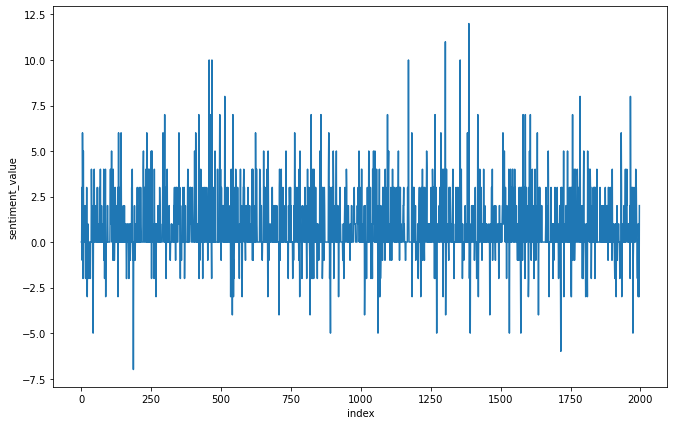

In [31]:
elontweets_line= elon_cln.copy()
elontweets_line['index']=range(0,len(elontweets_line))
plt.figure(figsize=(11,7))
sns.lineplot(y='sentiment_value',x='index',data=elontweets_line)

<AxesSubplot:title={'center':'sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

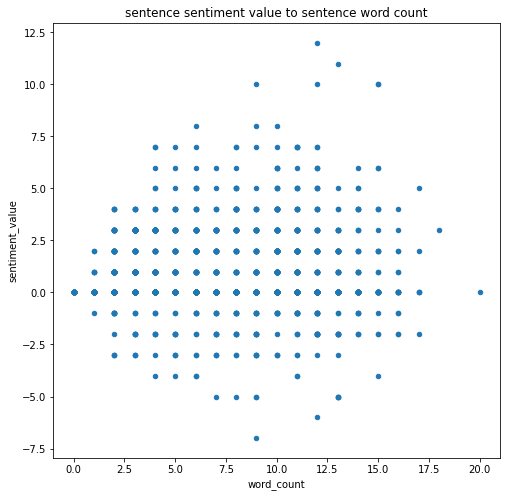

In [44]:
elontweets_line.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')

# Subjectivity and Polarity

In [36]:
!pip install textblob
import textblob            #to import
from textblob import TextBlob

In [37]:
# Get The Subjectivity

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [38]:
# Adding features Subjectivity & Polarity to dataset
elon_cln[["subjectivity", "polarity"]] = elon_cln.apply(sentiment_analysis, axis=1)
elon_cln.head(25)

,Text,sentiment_value,word_count,subjectivity,polarity
0,im alien,0,2,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0,7,0.000000,0.000000
2,joerogan spotify great interview,3,4,0.750000,0.800000
3,doge underestimated,-1,2,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,6,10,0.322222,0.200000
5,happy new year ox,3,4,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,-2,6,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,5,4,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0,8,0.500000,0.000000
9,entertaining outcome likely,2,3,0.850000,0.250000


In [39]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [40]:
elon_tweets=elon_cln.copy()
elon_tweets["tweet_kind"] = elon_tweets["polarity"].apply(analysis)
elon_tweets

,Text,sentiment_value,word_count,subjectivity,polarity,tweet_kind
0,im alien,0,2,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0,7,0.000000,0.000000,Neutral
2,joerogan spotify great interview,3,4,0.750000,0.800000,Positive
3,doge underestimated,-1,2,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china amazing ex...,6,10,0.322222,0.200000,Positive
...,...,...,...,...,...,...
1992,flcnhvy true sounds surreal negative propagand...,-3,11,0.508333,0.111111,Positive
1993,ppathole make sure read ur terms amp condition...,1,10,0.888889,0.500000,Positive
1994,teslagong ppathole samwise gamgee,0,4,0.000000,0.000000,Neutral
1995,ppathole altho dumb dumber,-3,4,0.500000,-0.375000,Negative


# Conclusion

In [42]:
elon_tweets['tweet_kind'].value_counts()

Neutral     960
Positive    838
Negative    199
Name: tweet_kind, dtype: int64

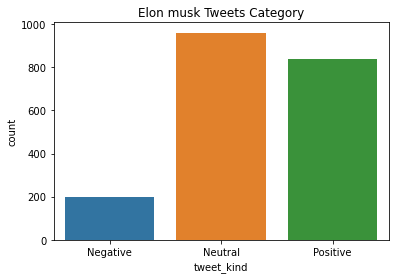

In [43]:
sns.countplot(elon_tweets['tweet_kind']).set_title("Elon musk Tweets Category")
plt.show()

# Problem- 2)

Extract reviews of any product from ecommerce website like amazon

Perform emotion mining

In [64]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup

### Taking Titan watch reviews from amazon for performing emotion mining

In [65]:
titan_watch=[]
for i in range (1,63):
    watch=[]
    url="https://www.amazon.in/Titan-Analog-Blue-Dial-Watch-1766SL03/product-reviews/B07DD2KBXV/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        watch.append(reviews[i].text)
    titan_watch=titan_watch+watch   

In [66]:
len(titan_watch)

10

In [67]:
titan_watch

['\nVery good and genuine.\n',
 '\nNice one\n',
 '\nIt a nice watch. But the band is hard a bit. The strip holder come out aftr 1 month due to hard strap.\n',
 '\nNice product. can go for purchase but value is high it can be bought under 2800. Thnks\n',
 '\nI really like this titan watch and all dials are perfectly work\n',
 "\nThe watch looks good.Works completely fine.It's comfortable.One should go for it with eyes closed.\n",
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n',
 '\nNice watch, Titan is always best.\n',
 '\nGave this as a gift to dad. The second loop in the strap broke on day 2. The watch dial and look is great, quality is doubtful. Returning the same.\n',
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Like\n']

# EDA

In [68]:
titan=pd.DataFrame.from_dict({"review":titan_watch})
pd.set_option('max_colwidth',500)

titan

,review
0,\nVery good and genuine.\n
1,\nNice one\n
2,\nIt a nice watch. But the band is hard a bit. The strip holder come out aftr 1 month due to hard strap.\n
3,\nNice product. can go for purchase but value is high it can be bought under 2800. Thnks\n
4,\nI really like this titan watch and all dials are perfectly work\n
5,\nThe watch looks good.Works completely fine.It's comfortable.One should go for it with eyes closed.\n
6,\n\n\n\n\n The media could not be loaded.\n \n\n\n
7,"\nNice watch, Titan is always best.\n"
8,"\nGave this as a gift to dad. The second loop in the strap broke on day 2. The watch dial and look is great, quality is doubtful. Returning the same.\n"
9,\n\n\n\n\n The media could not be loaded.\n \n\n\n\n Like\n


In [69]:
titan.shape

(10, 1)

In [70]:
titan.duplicated().value_counts()

False    10
dtype: int64

In [71]:
def deemojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [72]:
#regular expression
import re 
import string

def clean_text(text):
  text=text.lower()
  text=deemojify(text)
  text=re.sub('\[.*?-,\]','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  return text

clean=lambda x:clean_text(x)

In [73]:
titan_cln=titan.copy()
titan_cln['review']=titan_cln.review.apply(clean)
titan_cln

,review
0,\nvery good and genuine\n
1,\nnice one\n
2,\nit a nice watch but the band is hard a bit the strip holder come out aftr month due to hard strap\n
3,\nnice product can go for purchase but value is high it can be bought under thnks\n
4,\ni really like this titan watch and all dials are perfectly work\n
5,\nthe watch looks goodworks completely fineits comfortableone should go for it with eyes closed\n
6,\n\n\n\n\n the media could not be loaded\n \n\n\n
7,\nnice watch titan is always best\n
8,\ngave this as a gift to dad the second loop in the strap broke on day the watch dial and look is great quality is doubtful returning the same\n
9,\n\n\n\n\n the media could not be loaded\n \n\n\n\nlike\n


In [74]:
#removing stop words
titan_nosw=titan_cln.copy()
titan_nosw['review']=titan_nosw['review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
titan_nosw.head()

,review
0,good genuine
1,nice one
2,nice watch band hard bit strip holder come aftr month due hard strap
3,nice product go purchase value high bought thnks
4,really like titan watch dials perfectly work


In [75]:
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer1=CountVectorizer(min_df=1,max_df=5)
X1=vectorizer1.fit_transform(titan_nosw["review"])
word_freq_df1=pd.DataFrame({'term':vectorizer1.get_feature_names(),
                           'occurrences':np.asarray(X1.sum(axis=0)).ravel().tolist()})
word_freq_df1['frequency']=word_freq_df1['occurrences']/np.sum(word_freq_df1['occurrences'])

In [76]:
word_freq_df1.head()

,term,occurrences,frequency
0,aftr,1,0.014706
1,always,1,0.014706
2,band,1,0.014706
3,best,1,0.014706
4,bit,1,0.014706


In [77]:
#TFIDF -term frequency inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)# 1000 words
doc_vec2=vectorizer2.fit_transform(titan_nosw['review'])
names_features2=vectorizer2.get_feature_names()
dense2=doc_vec2.todense()
denselist2=dense2.tolist()
df2=pd.DataFrame(denselist2,columns=names_features2)

In [78]:
df2

,aftr,band,best,bit,bought,broke,closed,come,comfortableone,completely,...,really,returning,second,strap,strip,thnks,titan,value,watch,work
0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
2,0.282701,0.282701,0.00000,0.282701,0.00000,0.000000,0.00000,0.282701,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.240322,0.282701,0.00000,0.000000,0.00000,0.167874,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.39414,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.39414,0.000000,0.39414,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.415301,0.000000,0.000000,0.000000,0.000000,0.00000,0.353044,0.00000,0.246615,0.415301
5,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.36879,0.000000,0.36879,0.36879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.218995,0.000000
6,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.63088,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.536306,0.00000,0.374630,0.000000
8,0.000000,0.000000,0.00000,0.000000,0.00000,0.266546,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.266546,0.266546,0.226588,0.000000,0.00000,0.000000,0.00000,0.158280,0.000000
9,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


# Part of Speech tagging

In [79]:
titan_sen=titan_nosw.copy()
titan_sen=[x.strip() for x in titan_sen.review]# strip for removing lead n tail chars/spaces
titan_sen=[x for x in titan_sen if x]
titan_sen[0:5]

['good genuine',
 'nice one',
 'nice watch band hard bit strip holder come aftr month due hard strap',
 'nice product go purchase value high bought thnks',
 'really like titan watch dials perfectly work']

In [82]:
## part of speech tagging 
# nlp = spacy.load('en)

nlp=spacy.load('en_core_web_sm')

one_block=titan_sen[5]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [83]:
one_block

'watch looks goodworks completely fineits comfortableone go eyes closed'

In [84]:
for token in doc_block[0:5]:
  print(token,token.pos_)

watch VERB
looks VERB
goodworks NOUN
completely ADV
fineits VERB


In [85]:
# filetring for nouns & verbs 
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[0:5])

['watch', 'looks', 'goodworks', 'fineits', 'comfortableone']


In [86]:
import nltk

nltk.download('punkt')
text=" ".join(titan_nosw["review"])
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ancha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
text_tokens[:5]

['good', 'genuine', 'nice', 'one', 'nice']

In [88]:
len(text_tokens)

68

# Emotion Mining

In [89]:
#custom function : score each word in a sentence in lemmatise form,
#but calculated the score for the whole original sentence

nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [90]:
titan_nosw['sentiment_value']=titan_nosw['review'].apply(calculate_sentiment)

good genuine
nice one
nice watch band hard bit strip holder come aftr month due hard strap
nice product go purchase value high bought thnks
really like titan watch dials perfectly work
watch looks goodworks completely fineits comfortableone go eyes closed
media could loaded
nice watch titan always best
gave gift dad second loop strap broke day watch dial look great quality doubtful returning
media could loaded like


In [91]:
#word count
titan_nosw['word_count']=titan_nosw['review'].str.split().apply(len)
titan_nosw['word_count'].head(5)

0     2
1     2
2    13
3     8
4     7
Name: word_count, dtype: int64

In [92]:
titan_nosw.sort_values(by='sentiment_value').tail(5)

,review,sentiment_value,word_count
1,nice one,3,2
3,nice product go purchase value high bought thnks,3,8
7,nice watch titan always best,3,5
8,gave gift dad second loop strap broke day watch dial look great quality doubtful returning,4,15
4,really like titan watch dials perfectly work,5,7


In [93]:
titan_nosw[titan_nosw['sentiment_value']<0]

,review,sentiment_value,word_count


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

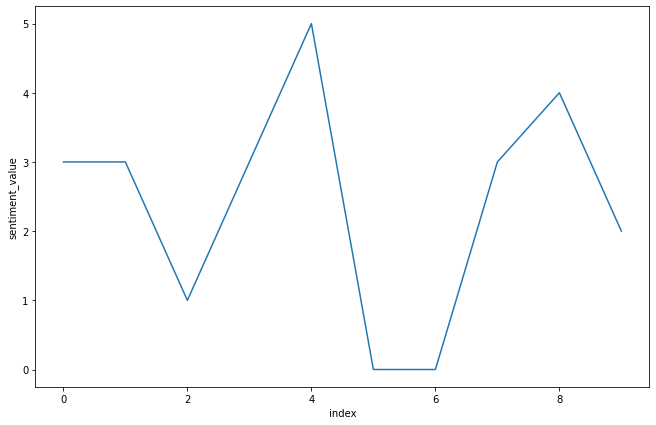

In [94]:
titan_line=titan_nosw.copy()
titan_line['index']=range(0,len(titan_line))
plt.figure(figsize=(11,7))
sns.lineplot(y='sentiment_value',x='index',data=titan_line)

<AxesSubplot:title={'center':'sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

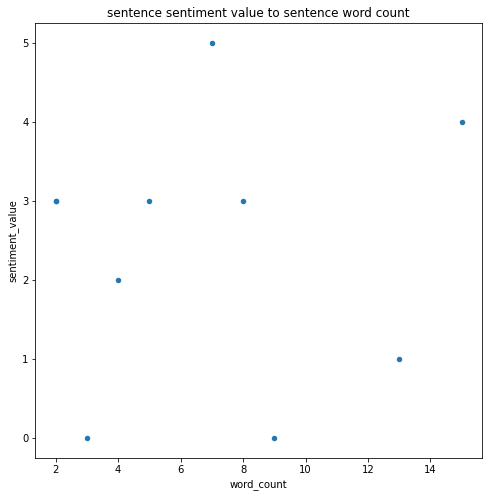

In [96]:
titan_line.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')

# Subjectivity and Polarity

In [97]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [99]:
# Adding features Subjectivity & Polarity to dataset
titan_sbpt=titan_nosw.copy()
titan_sbpt[["subjectivity", "polarity"]] = elon_cln.apply(sentiment_analysis, axis=1)
titan_sbpt.head()

,review,sentiment_value,word_count,subjectivity,polarity
0,good genuine,3,2,0.750000,-0.25
1,nice one,3,2,0.000000,0.00
2,nice watch band hard bit strip holder come aftr month due hard strap,1,13,0.750000,0.80
3,nice product go purchase value high bought thnks,3,8,0.000000,0.00
4,really like titan watch dials perfectly work,5,7,0.322222,0.20


In [100]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [101]:
titan_sbpt["review_kind"] = titan_sbpt["polarity"].apply(analysis)
titan_sbpt

,review,sentiment_value,word_count,subjectivity,polarity,review_kind
0,good genuine,3,2,0.750000,-0.250000,Negative
1,nice one,3,2,0.000000,0.000000,Neutral
2,nice watch band hard bit strip holder come aftr month due hard strap,1,13,0.750000,0.800000,Positive
3,nice product go purchase value high bought thnks,3,8,0.000000,0.000000,Neutral
4,really like titan watch dials perfectly work,5,7,0.322222,0.200000,Positive
5,watch looks goodworks completely fineits comfortableone go eyes closed,0,9,0.727273,0.468182,Positive
6,media could loaded,0,3,0.300000,-0.500000,Negative
7,nice watch titan always best,3,5,0.250000,0.200000,Positive
8,gave gift dad second loop strap broke day watch dial look great quality doubtful returning,4,15,0.500000,0.000000,Neutral
9,media could loaded like,2,4,0.850000,0.250000,Positive


In [102]:
titan_sbpt['review_kind'].value_counts()

Positive    5
Neutral     3
Negative    2
Name: review_kind, dtype: int64

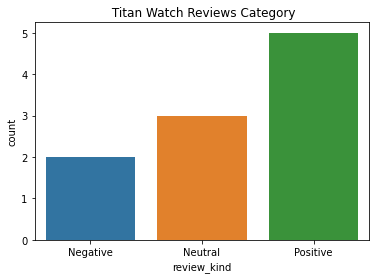

In [103]:
sns.countplot(titan_sbpt['review_kind']).set_title(" Titan Watch Reviews Category")
plt.show()